# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [33]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [34]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

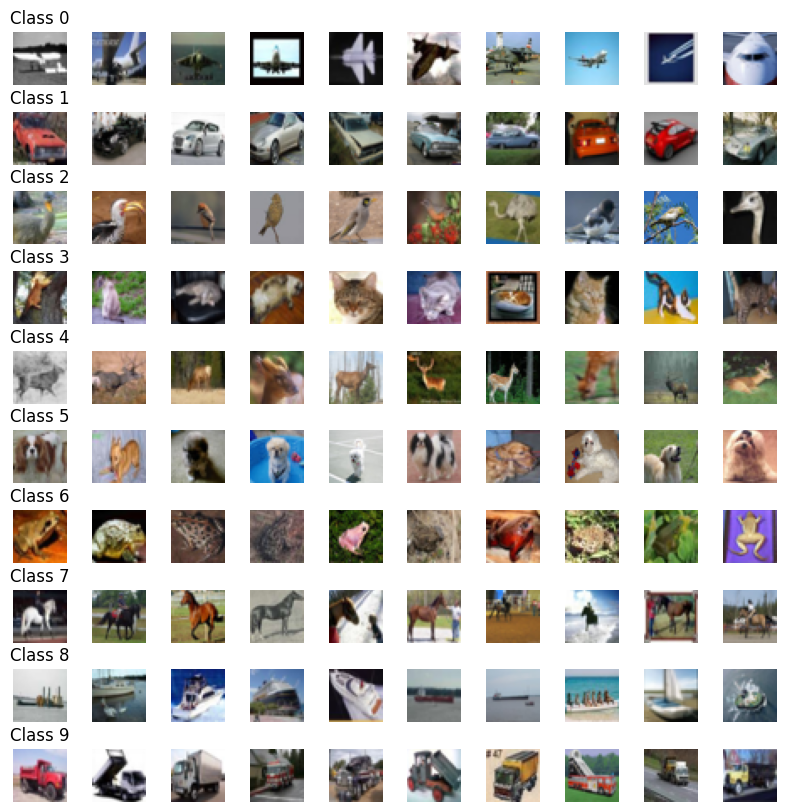

In [35]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
fig.subplots_adjust(hspace=0.5)

# We want to pick 10 random samples for each class
for i in range(10):
    class_indices = np.where(y_train == i)[0]  # Get the indices of all images belonging to class i
    random_samples = np.random.choice(class_indices, 10, replace=False)  # Choose 10 random samples

    for j, idx in enumerate(random_samples):
        ax = axes[i, j]
        ax.imshow(x_train[idx])
        ax.axis('off')
        if j == 0:
            ax.set_title(f'Class {i}')

plt.show()

In [36]:
X_train = x_train.astype('float32')
X_test = x_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [37]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [38]:
from keras.backend import clear_session
clear_session()

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential()

# 1. Convolutional Layer with 32 filters, (3, 3) kernel size, 'relu' activation function
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# 2. Max Pooling Layer with pool size of (2, 2)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3. Flatten the output of the previous layer (convert 2D to 1D)
model.add(Flatten())

# 4. Fully Connected Dense Layer with 100 units and 'relu' activation function
model.add(Dense(100, activation='relu'))

# 5. Output Layer with 10 units for classification (softmax for multi-class classification)
model.add(Dense(10, activation='softmax'))

# Display the model summary



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [40]:
# Your code here :
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()

history_baseline = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.1499 - loss: 2.2784 - val_accuracy: 0.2065 - val_loss: 2.1971
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2316 - loss: 2.1636 - val_accuracy: 0.2577 - val_loss: 2.0637
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2822 - loss: 2.0380 - val_accuracy: 0.3027 - val_loss: 1.9720
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3122 - loss: 1.9555 - val_accuracy: 0.3298 - val_loss: 1.9161
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3345 - loss: 1.9025 - val_accuracy: 0.3471 - val_loss: 1.8730
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3472 - loss: 1.8717 - val_accuracy: 0.3509 - val_loss: 1.8454
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3602 - loss: 1.8451 - val_accuracy: 0.3676 - val_loss: 1.8179
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.3656 - loss: 1.8132 - val_accuracy: 0.3705 - val_loss

*   Plot the cross entropy loss curve and the accuracy curve

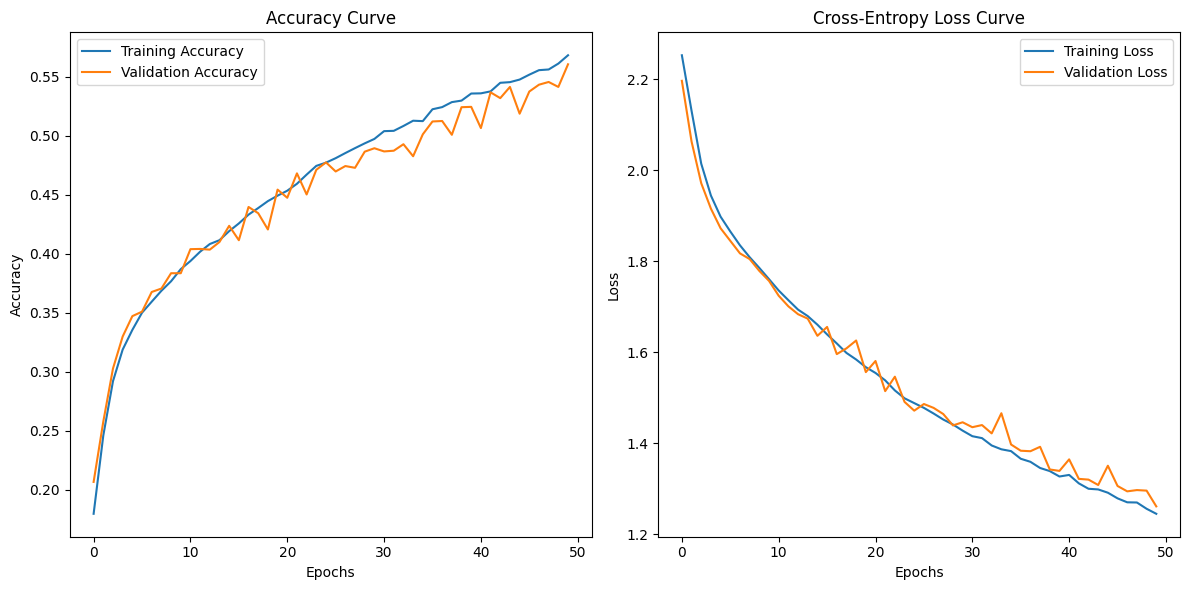

In [41]:
# Your code here :
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and validation loss (cross-entropy loss)
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['loss'], label='Training Loss')
plt.plot(history_baseline.history['val_loss'], label='Validation Loss')
plt.title('Cross-Entropy Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [42]:
from keras.backend import clear_session
clear_session()

In [43]:
from tensorflow.keras import layers, models

def build_vgg_cifar10(input_shape=(32, 32, 3), num_classes=10):
    model_vgg = models.Sequential()

    # First Conv Block
    model_vgg.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model_vgg.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Fully Connected Layer
    model_vgg.add(layers.Flatten())
    model_vgg.add(layers.Dense(128, activation='relu'))

    # Classification Layer
    model_vgg.add(layers.Dense(num_classes, activation='softmax'))

    return model_vgg


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [44]:
# Your code here :
model_vgg.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model_vgg.summary()

# Train the model
history_vgg = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_data=(X_test, y_test))

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,006 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5691 - loss: 1.2364 - val_accuracy: 0.5531 - val_loss: 1.2649
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5691 - loss: 1.2417 - val_accuracy: 0.5484 - val_loss: 1.2804
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5714 - loss: 1.2330 - val_accuracy: 0.5413 - val_loss: 1.3000
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5681 - loss: 1.2422 - val_accuracy: 0.5570 - val_loss: 1.2484
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5759 - loss: 1.2116 - val_accuracy: 0.5544 - val_loss: 1.2623
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5774 - loss: 1.2086 - val_accuracy: 0.5642 - val_loss: 1.2393
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5785 - loss: 1.2096 - val_accuracy: 0.5505 - val_loss: 1.2753
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5815 - loss: 1.2029 - val_accuracy: 0.5487 - val_loss:

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


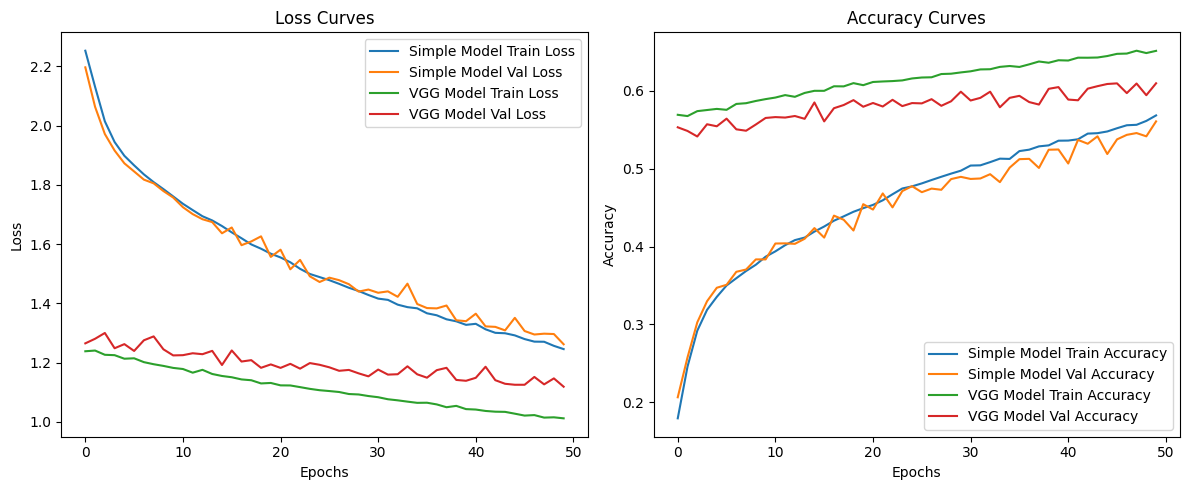

In [45]:
# Your code here :
# Plotting the loss and accuracy for both models
# Loss Curves
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history_baseline.history['loss'], label='Simple Model Train Loss')
plt.plot(history_baseline.history['val_loss'], label='Simple Model Val Loss')
plt.plot(history_vgg.history['loss'], label='VGG Model Train Loss')
plt.plot(history_vgg.history['val_loss'], label='VGG Model Val Loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(history_baseline.history['accuracy'], label='Simple Model Train Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Simple Model Val Accuracy')
plt.plot(history_vgg.history['accuracy'], label='VGG Model Train Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='VGG Model Val Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

**Comment on the observation**

The VGG model outperforms the baseline model.
...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


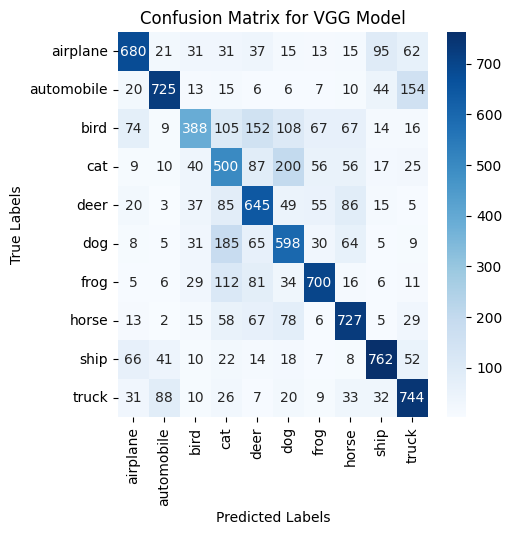

In [46]:
# Your code here :
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the output for the test data
y_pred = model_vgg.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoded form to class labels
y_test_labels = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for VGG Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



**Comment here :**


Model seems to be performing quite well, with strong diagonal values indicating high accuracy. However, there are some misclassifications in certain categories.
...

*    Print the test accuracy for the trained model.

In [47]:
# Your code here :
test_loss, test_acc = model_vgg.evaluate(X_test, y_test, verbose=2)

# Print the test accuracy
print(f"Test Accuracy: {test_acc * 100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.6469 - loss: 1.0400
Test Accuracy: 64.69%


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [48]:
from keras.backend import clear_session
clear_session()

In [49]:
def build_vgg_model(input_shape=(64, 64, 3), num_classes=10):
    model_vgg2 = models.Sequential()

    # First Conv Block
    model_vgg2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model_vgg2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_vgg2.add(layers.MaxPooling2D((2, 2)))

    # Second Conv Block
    model_vgg2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_vgg2.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_vgg2.add(layers.MaxPooling2D((2, 2)))

    # Third Conv Block
    model_vgg2.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model_vgg2.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model_vgg2.add(layers.MaxPooling2D((2, 2)))

    # Flatten and Fully Connected Layer
    model_vgg2.add(layers.Flatten())
    model_vgg2.add(layers.Dense(128, activation='relu'))

    # Classification Layer
    model_vgg2.add(layers.Dense(num_classes, activation='softmax'))

    return model_vgg2

# Example usage
model_vgg2 = build_vgg_model()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [50]:
# Your code here :
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

# Display model summary
model.summary()


Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6522 - loss: 1.0086 - val_accuracy: 0.6046 - val_loss: 1.1318
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6521 - loss: 1.0014 - val_accuracy: 0.6148 - val_loss: 1.1038
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6557 - loss: 0.9967 - val_accuracy: 0.6143 - val_loss: 1.1091
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6570 - loss: 0.9912 - val_accuracy: 0.6016 - val_loss: 1.1348
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6594 - loss: 0.9884 - val_accuracy: 0.6069 - val_loss: 1.1201
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6559 - loss: 0.9875 - val_accuracy: 0.6178 - val_loss: 1.1019
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6638 - loss: 0.9779 - val_accuracy: 0.6119 - val_loss: 1.1076
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6591 - loss: 0.9887 - val_accuracy: 0.6121 - val_loss

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         720,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 722,008 (2.75 MB)

 Trainable params: 722,006 (2.75 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


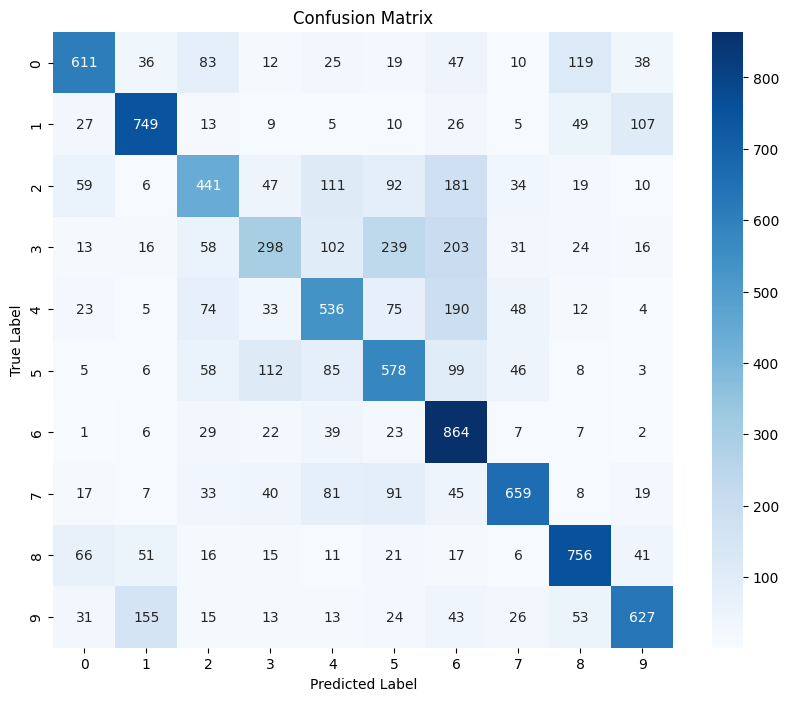

In [52]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:



_

2 - Key Differences between sigmoid and softmax:

Use sigmoid for binary classification (single output neuron).
Use softmax for multi-class classification where only one class should be predicted per instance.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:

Use BCE for binary classification (e.g., Spam Detection, Tumor Classification: Malignant vs. Benign).
Use CCE for multi-class classification (e.g., Animal Classification: Dog, Cat, Horse).
_
